In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine=pd.read_csv('winequality-red.csv', sep=';')

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null object
quality                 1599 non-null int64
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [4]:
print (wine[ pd.to_numeric(wine['alcohol'], errors='coerce').isnull()])
## error in the alcohol ros below

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1359           11.6             0.475         0.40             1.4      0.091   
1362           11.6             0.475         0.40             1.4      0.091   
1439            7.3             0.670         0.02             2.2      0.072   
1441            7.4             0.785         0.19             5.2      0.094   
1475            5.3             0.470         0.11             2.2      0.048   
1514            6.9             0.840         0.21             4.1      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1359                  6.0                  28.0  0.99704  3.07       0.65   
1362                  6.0                  28.0  0.99704  3.07       0.65   
1439                 31.0                  92.0  0.99566  3.32       0.68   
1441                 19.0                  98.0  0.99713  3.16       0.52   
1475                 16.0                  89.0

In [5]:
## removing the rows with the faulty numbers to keep the data clean. 
wine=wine.drop(wine.index[[1359,1362,1439,1441,1475,1514]])

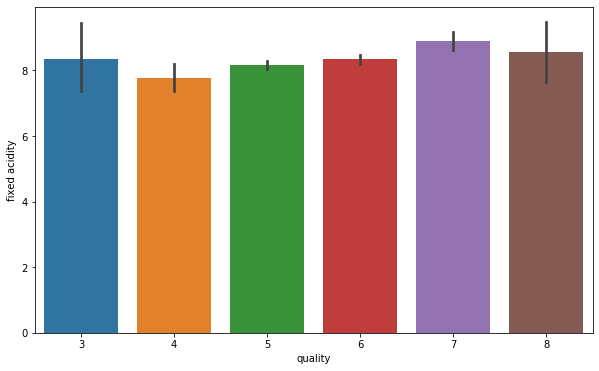

In [6]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

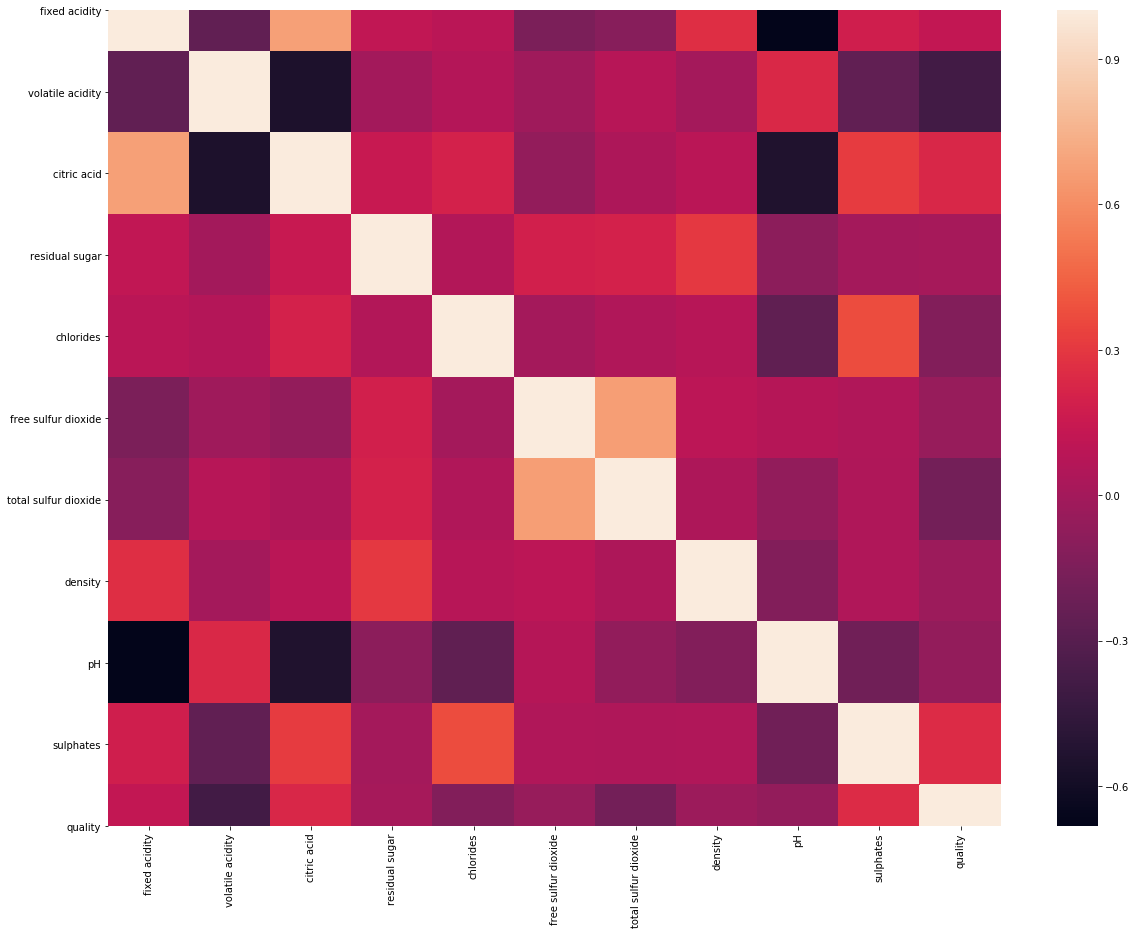

In [7]:
fig= plt.subplots(figsize=(20,15))
corr = wine.corr()
sns.heatmap(corr)

In [8]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [9]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [10]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40, stratify=y)

In [12]:
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\ramzi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ramzi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ramzi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ramzi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [15]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       276
           1       0.71      0.35      0.47        43

   micro avg       0.89      0.89      0.89       319
   macro avg       0.81      0.66      0.70       319
weighted avg       0.88      0.89      0.88       319



In [16]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[270   6]
 [ 28  15]]


In [17]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\ramzi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [18]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       276
           1       0.49      0.47      0.48        43

   micro avg       0.86      0.86      0.86       319
   macro avg       0.70      0.69      0.70       319
weighted avg       0.86      0.86      0.86       319



In [19]:
print(confusion_matrix(y_test, pred_sgd))

[[255  21]
 [ 23  20]]


In [20]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [21]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       276
           1       0.72      0.30      0.43        43

   micro avg       0.89      0.89      0.89       319
   macro avg       0.81      0.64      0.68       319
weighted avg       0.88      0.89      0.87       319



In [22]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [23]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.8, 'kernel': 'rbf'}

In [26]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.4, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       276
           1       0.74      0.47      0.57        43

   micro avg       0.91      0.91      0.91       319
   macro avg       0.83      0.72      0.76       319
weighted avg       0.90      0.91      0.90       319



In [27]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9073930484343526